<a href="https://colab.research.google.com/github/Akshat13shah/STT-_Ai_Assignment7/blob/main/STTAI_Assignment_7_group_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 18

1.  Paras Prashant Shirvale
* Roll Number: 23110232

2. Akshat Shah
* 23110293

GitHub Repository: https://github.com/Akshat13shah/STT-_Ai_Assignment7

##### ***Task 1: Dataset Preparation (10%)***


1.	Load the training dataset and test data (Dataset 1). [UPDATED DATASET]

2.	Also, the IMDB dataset (Dataset 2) can be used for continual learning.

3.	Use 20% of the training dataset as the validation set.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load SST2 training dataset
sst2_train_url = 'https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/train.tsv'
sst2_train_data = pd.read_csv(sst2_train_url, sep='\t', header=None, names=['text', 'label'])

# Load SST2 test dataset
sst2_test_url = 'https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/test.tsv'
sst2_test_data = pd.read_csv(sst2_test_url, sep='\t', header=None, names=['text', 'label'])

In [39]:
print(sst2_train_data.size)
sst2_train_data.head()

13840


,text,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [40]:
print(sst2_test_data.shape)
sst2_test_data.head()

(1821, 2)


,text,label
0,"no movement , no yuks , not much of anything",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films,1


In [41]:
# Split the dataset into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(
    sst2_train_data['text'], sst2_train_data['label'], test_size=0.2, random_state=42
)

# Display the sizes of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_validation.shape}")

Training set shape: (5536,)
Validation set shape: (1384,)


In [42]:
X_train.head()

,text
4457,graphic sex may be what 's attracting audience...
2471,perhaps the grossest movie ever made
26,"the film is moody , oozing , chilling and hear..."
4828,watching the chemistry between freeman and jud...
63,the wonderfully lush morvern callar is pure pu...


In [43]:
X_validation.head()

,text
468,overly melodramatic
1956,lrb westbrook rrb makes a wonderful subject fo...
800,mama africa pretty much delivers on that promise
6474,"sad nonsense , this"
2389,easily the most thoughtful fictional examinati...


In [44]:
# Load IMDB dataset
imdb_url = 'https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv'
imdb_data = pd.read_csv(imdb_url)

print(imdb_data.shape)
imdb_data.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [45]:
# Convert sentiment labels to numeric (0 = negative, 1 = positive)
imdb_data['sentiment'] = imdb_data['sentiment'].map({'negative': 0, 'positive': 1})

# Assuming 'review' is the text column and 'sentiment' is the label column
X_imdb_train, X_imdb_validation, y_imdb_train, y_imdb_validation = train_test_split(
    imdb_data['review'], imdb_data['sentiment'], test_size=0.2, random_state=42
)

In [46]:
print(imdb_data.shape)
imdb_data.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


##### ***Task 2: Construct a Multi-Layer Perceptron (MLP) model. (20%)***
1. The parameter should be with:
*	hidden_sizes=[512, 256, 128, 64]
*	Output should have two labels.
2. Count the number of trainable parameters in the model using the automated function.

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchsummary import summary
from sklearn.metrics import accuracy_score

In [48]:
class MLP(nn.Module):
    def __init__(self) -> None:
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(10000, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 2)

        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)

    def forward(self, x):
        x = self.dropout(self.activation(self.layer1(x)))
        x = self.dropout(self.activation(self.layer2(x)))
        x = self.dropout(self.activation(self.layer3(x)))
        x = self.dropout(self.activation(self.layer4(x)))
        x = self.layer5(x)

        return x

In [49]:
model = MLP()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(model)
summary(model, input_size=(1, 10000))

MLP(
  (layer1): Linear(in_features=10000, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=2, bias=True)
  (activation): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 512]       5,120,512
              ReLU-2               [-1, 1, 512]               0
           Dropout-3               [-1, 1, 512]               0
            Linear-4               [-1, 1, 256]         131,328
              ReLU-5               [-1, 1, 256]               0
           Dropout-6               [-1, 1, 256]               0
            Linear-7               [-1, 1, 128]          32,896
              ReLU-8       

In [50]:
from torch.optim import Adam

model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.0001)

In [51]:
import gzip
import pickle

# Save the checkpoint
def save_checkpoint(model, path="checkpoint.pt.gz"):
    checkpoint = {
        "model_state_dict": model.state_dict()
    }
    with gzip.open(path, 'wb') as f:
        pickle.dump(checkpoint, f)
    print(f"Model weights saved successfully to {path}")

In [52]:
# Load the checkpoint
def load_checkpoint(model, path="checkpoint.pt.gz"):
    with gzip.open(path, 'rb') as f:
        checkpoint = pickle.load(f)
    model.load_state_dict(checkpoint["model_state_dict"])
    print(f"Model weights loaded successfully from {path}")

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000)
X_train_bow = vectorizer.fit_transform(X_train)
X_validation_bow = vectorizer.transform(X_validation)
X_test_bow = vectorizer.transform(sst2_test_data['text'])

In [54]:
# Convert to PyTorch tensors
X_train_bow = torch.tensor(X_train_bow.toarray(), dtype=torch.float32).to(device)
X_val_bow = torch.tensor(X_validation_bow.toarray(), dtype=torch.float32).to(device)
X_test_bow = torch.tensor(X_test_bow.toarray(), dtype=torch.float32).to(device)

# Labels (assuming binary classification)
y_train_bow = torch.tensor(y_train.values, dtype=torch.long).to(device)
y_val_bow = torch.tensor(y_validation.values, dtype=torch.long).to(device)
y_test_bow = torch.tensor(sst2_test_data["label"].values, dtype=torch.long).to(device)

In [55]:
print(X_train_bow.shape)

torch.Size([5536, 10000])


In [56]:
batch_size = 32
train_dataset = TensorDataset(X_train_bow, y_train_bow)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

validation_dataset = TensorDataset(X_val_bow, y_val_bow)
validation_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [57]:
!pip install torchsummary tqdm

In [58]:
best_validation_accuracy = 0.0
number_of_epochs = 10

validation_losses = []
train_losses = []
validation_accuracy_data = []

In [59]:
from torch.utils.tensorboard import SummaryWriter
from tqdm.notebook import tqdm

writer = SummaryWriter()

for epoch in range(number_of_epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1} (Training)"):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    total_loss /= len(train_loader)

    model.eval()
    val_loss = 0
    pred, truth = [], []
    with torch.no_grad():
       for X_batch, y_batch in tqdm(validation_loader, desc=f"Epoch {epoch+1} (Validating)"):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            predictions = torch.argmax(outputs, dim=1)
            loss = criterion(outputs, y_batch)
            pred.extend(predictions.cpu().numpy())
            truth.extend(y_batch.cpu().numpy())

            val_loss += loss.item()

    val_loss /= len(validation_loader)
    val_acc = accuracy_score(truth, pred)

    print(f"Epoch {epoch+1}/{number_of_epochs}, Train Loss: {total_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}\n")
    for name, param in model.named_parameters():
        if param.requires_grad:
            writer.add_histogram(f"{name}/weights", param.data, epoch)
            writer.add_histogram(f"{name}/grads", param.grad, epoch)
    train_losses.append(total_loss)
    validation_losses.append(val_loss)
    validation_accuracy_data.append(val_acc)

    if val_acc > best_validation_accuracy:
        best_validation_accuracy = val_acc
        save_checkpoint(model, "checkpoint_best.json.gz")
        print("Saved Best Model")

    if epoch % 5 == 0:
        save_checkpoint(model, f"checkpoint_epoch_{epoch}.json.gz")
        print("Saved Fallback Model")

writer.close()

Epoch 1 (Training):   0%|          | 0/173 [00:00<?, ?it/s]

Epoch 1 (Validating):   0%|          | 0/44 [00:00<?, ?it/s]

Epoch 1/10, Train Loss: 0.6948, Val Loss: 0.6848, Val Acc: 0.6113

Model weights saved successfully to checkpoint_best.json.gz
Saved Best Model
Model weights saved successfully to checkpoint_epoch_0.json.gz
Saved Fallback Model


Epoch 2 (Training):   0%|          | 0/173 [00:00<?, ?it/s]

Epoch 2 (Validating):   0%|          | 0/44 [00:00<?, ?it/s]

Epoch 2/10, Train Loss: 0.5862, Val Loss: 0.4837, Val Acc: 0.7803

Model weights saved successfully to checkpoint_best.json.gz
Saved Best Model


Epoch 3 (Training):   0%|          | 0/173 [00:00<?, ?it/s]

Epoch 3 (Validating):   0%|          | 0/44 [00:00<?, ?it/s]

Epoch 3/10, Train Loss: 0.2904, Val Loss: 0.4809, Val Acc: 0.8035

Model weights saved successfully to checkpoint_best.json.gz
Saved Best Model


Epoch 4 (Training):   0%|          | 0/173 [00:00<?, ?it/s]

Epoch 4 (Validating):   0%|          | 0/44 [00:00<?, ?it/s]

Epoch 4/10, Train Loss: 0.1347, Val Loss: 0.5409, Val Acc: 0.8092

Model weights saved successfully to checkpoint_best.json.gz
Saved Best Model


Epoch 5 (Training):   0%|          | 0/173 [00:00<?, ?it/s]

Epoch 5 (Validating):   0%|          | 0/44 [00:00<?, ?it/s]

Epoch 5/10, Train Loss: 0.0624, Val Loss: 0.7088, Val Acc: 0.7948



Epoch 6 (Training):   0%|          | 0/173 [00:00<?, ?it/s]

KeyboardInterrupt: 

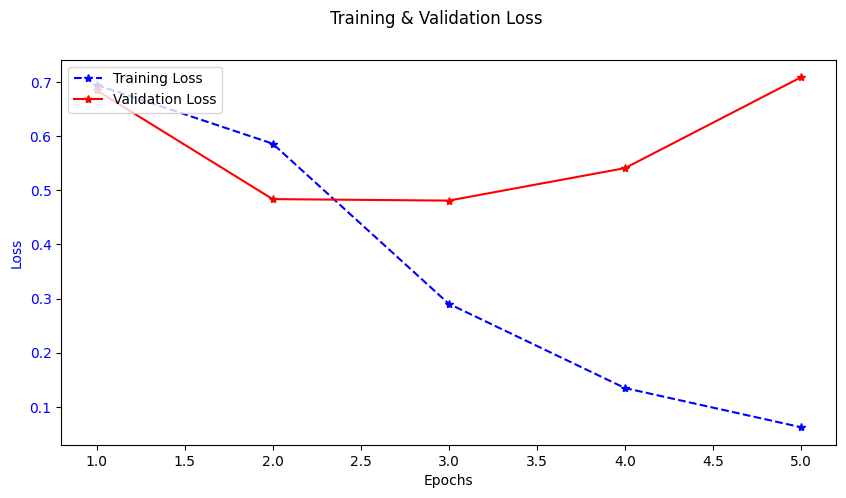

In [60]:
import matplotlib.pyplot as plt

# Creating the first figure for Loss
fig1, ax1 = plt.subplots(figsize=(10, 5))
epochs = range(1, len(train_losses) + 1)

# Plotting Training Loss and Validation Loss
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss", color="blue")
ax1.plot(epochs, train_losses, label="Training Loss", marker="*", color="blue", linestyle="dashed")
ax1.plot(epochs, validation_losses, label="Validation Loss", marker="*", color="red")

# Adjust tick parameters and show legends
ax1.tick_params(axis="y", labelcolor="blue")
ax1.legend(loc="upper left")

# Adding title
fig1.suptitle("Training & Validation Loss")
plt.show()

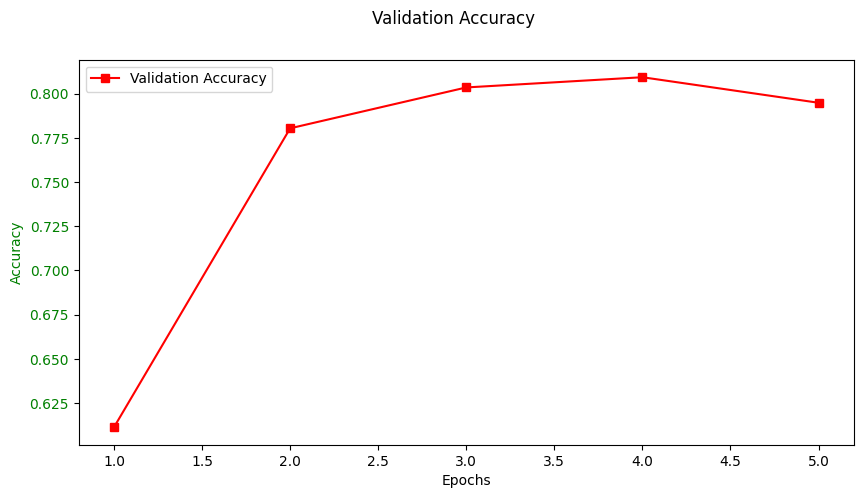

In [61]:
# Creating the second figure for Accuracy
fig2, ax2 = plt.subplots(figsize=(10, 5))

# Plotting Validation Accuracy
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy", color="green")
ax2.plot(epochs, validation_accuracy_data, label="Validation Accuracy", marker="s", color="red")

# Adjust tick parameters and show legends
ax2.tick_params(axis="y", labelcolor="green")
ax2.legend(loc="upper left")

# Adding title
fig2.suptitle("Validation Accuracy")
plt.show()

In [62]:
class Embedder:
    def __init__(self):
        self.tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.1-8B")
        self.model = AutoModel.from_pretrained("meta-llama/Llama-3.1-8B").to(device)
        self.embedding_size = self.model.config.hidden_size
        self.tokenizer.pad_token = self.tokenizer.eos_token
        self.model_loaded = True

    def get_embeddings(self, text):
        inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=32).to(device)
        with torch.no_grad():
            outputs = self.model(**inputs)
        return outputs.last_hidden_state.mean(dim=1)

In [63]:
class MLP2(nn.Module):
    def __init__(self, input_layer=4096) -> None:
        super(MLP2, self).__init__()
        self.layer1 = nn.Linear(input_layer, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 2)

        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)

    def forward(self, x):
        x = self.dropout(self.activation(self.layer1(x)))
        x = self.dropout(self.activation(self.layer2(x)))
        x = self.dropout(self.activation(self.layer3(x)))
        x = self.dropout(self.activation(self.layer4(x)))
        x = self.layer5(x)

        return x

In [64]:
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        return text, label

In [65]:
best_validation_accuracy = 0.0
number_of_epochs = 10

validation_losses_1 = []
train_losses_1 = []
validation_accuracy_data_1 = []

In [66]:
from transformers import BertTokenizer, BertModel, AutoTokenizer, AutoModel

In [67]:
MODEL_NAME = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
bert_model = BertModel.from_pretrained(MODEL_NAME).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [74]:
def get_bert_embeddings(texts):
    encoded_inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        bert_outputs = bert_model(**encoded_inputs)
    embeddings = bert_outputs.last_hidden_state.mean(dim=1)  # Mean Pooling
    return embeddings

In [69]:
model2 = MLP2(bert_model.config.hidden_size)
model2.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model2.parameters(), lr=0.0001)

In [70]:
batch_size = 32

X_train_texts = X_train.tolist()
X_validation_texts = X_validation.tolist()

y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_validation_tensor = torch.tensor(y_validation.values, dtype=torch.long)

In [75]:
get_bert_embeddings(X_train_texts[1])

tensor([[-1.5052e-01, -5.6695e-02,  1.6346e-01,  1.8312e-01, -2.7951e-01,
          2.0863e-01,  2.0816e-01,  7.3770e-01, -1.1857e-01,  1.9645e-01,
          4.9284e-01, -5.4372e-01,  1.6459e-01,  7.6895e-01,  1.6397e-01,
         -1.7003e-01, -2.6442e-01, -1.4567e-01,  2.1038e-01, -1.1301e-01,
          4.2156e-02, -1.7179e-01, -2.3647e-01,  2.0034e-01,  4.0261e-01,
          2.0334e-01, -1.1859e-01, -1.0451e-01, -2.3237e-01, -2.6500e-01,
          2.8464e-01, -2.7388e-01, -4.4876e-03,  2.5541e-01,  5.1806e-02,
         -3.2250e-01,  1.3682e-01, -1.7975e-01, -3.7544e-01,  1.5705e-01,
         -4.6794e-01, -2.8932e-01,  4.5125e-01,  4.6364e-02, -6.2811e-01,
         -1.3414e-01,  9.4773e-01,  1.8446e-01,  2.6226e-01, -3.6767e-03,
          5.1670e-02,  1.3690e-02, -2.1580e-01, -2.4829e-01, -1.1066e-02,
          3.2194e-01,  2.7992e-02, -5.7850e-01, -3.4071e-01,  2.1717e-01,
          7.4051e-04,  9.5341e-02, -2.4929e-01, -5.5714e-01,  2.4507e-01,
          4.6162e-01,  9.9723e-02,  5.

In [76]:
X_train_tensor = []
for text in tqdm(X_train_texts, "Converting Text to Vectors (Train)"):
    X_train_tensor.append(torch.Tensor(get_bert_embeddings(text)))

X_validation_tensor = []
for text in tqdm(X_validation_texts, "Converting Text to Vectors (Test)"):
    X_validation_tensor.append(torch.Tensor(get_bert_embeddings(text)))

X_train_tensor = torch.cat(X_train_tensor, dim=0)
X_validation_tensor = torch.cat(X_validation_tensor, dim=0)

Converting Text to Vectors (Train):   0%|          | 0/5536 [00:00<?, ?it/s]

Converting Text to Vectors (Test):   0%|          | 0/1384 [00:00<?, ?it/s]

In [77]:
import pickle

with open('X_train_tesnsor.pickle', 'wb') as handle:
    pickle.dump(X_train_tensor, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('X_test_tesnsor.pickle', 'wb') as handle:
    pickle.dump(X_validation_tensor, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_validation_tensor, y_validation_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)